In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
data = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
)


train_datasets = "PLD_3_classes_256/Training"
valid_datasets = "PLD_3_classes_256/Validation"

train = data.flow_from_directory(
    train_datasets,
    target_size = (256, 256),
    class_mode = 'categorical',
    classes = ['Early_Blight', 'Healthy', 'Late_Blight']
)

valid = data.flow_from_directory(
    valid_datasets,
    target_size = (256, 256),
    class_mode = 'categorical',
    classes = ['Early_Blight', 'Healthy', 'Late_Blight']
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [4]:
train[0][1]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

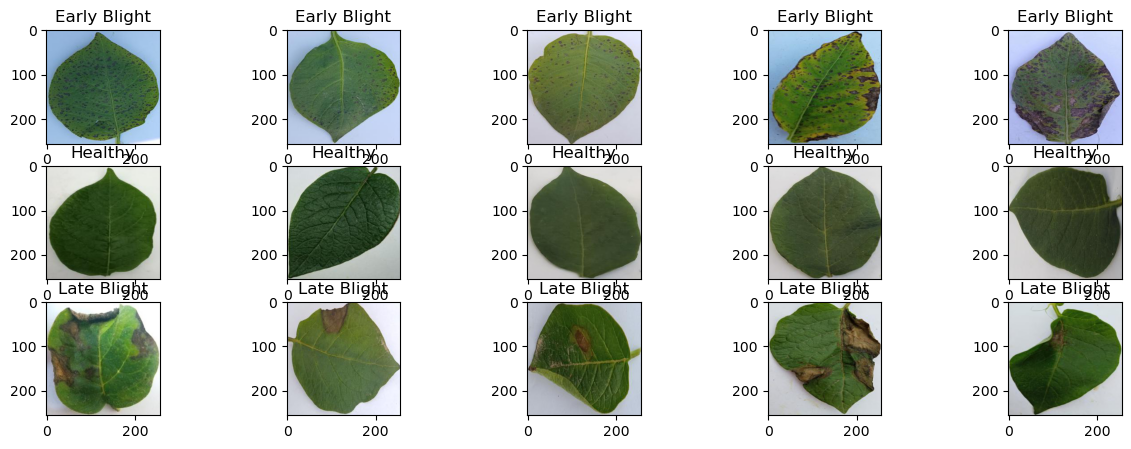

In [17]:
class_names = ['Early_Blight', 'Healthy', 'Late_Blight']

# train_datasets

ely = os.path.join("PLD_3_classes_256/Training/Early_Blight")
heal = os.path.join("PLD_3_classes_256/Training/Healthy")
late = os.path.join("PLD_3_classes_256/Training/Late_Blight")

ely_img = [os.path.join(ely, i) for i in os.listdir(ely)]
heal_img = [os.path.join(heal, i) for i in os.listdir(heal)]
late_img = [os.path.join(late, i) for i in os.listdir(late)]


f, axarr = plt.subplots(3, 5, figsize=(15,5))
for i in range(5):
    img = mpimg.imread(ely_img[i])
    axarr[0, i].imshow(img)
    axarr[0, i].set_title("Early Blight")

for i in range(5):
    img = mpimg.imread(heal_img[i])
    axarr[1, i].imshow(img)
    axarr[1, i].set_title("Healthy")

for i in range(5):
    img = mpimg.imread(late_img[i])
    axarr[2, i].imshow(img)
    axarr[2, i].set_title("Late Blight")

plt.show()

In [24]:
model = models.Sequential([
    layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(256 ,256 ,3) ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(3 , activation = 'softmax'),
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 64)       

In [28]:
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [32]:
model.fit(train ,validation_data=valid, epochs=5)

Epoch 1/5
 45/102 [============>.................] - ETA: 4:11 - loss: 1.0282 - accuracy: 0.4326

KeyboardInterrupt: 

In [31]:
import os
print('Get current working directory : ', os.getcwd())

Get current working directory :  C:\Users\Admin\PycharmProjects\pythonProject\POTATO
